In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import spacy
import re
import unidecode
from nltk.stem import PorterStemmer, WordNetLemmatizer
import emoji
import contractions
from textblob import TextBlob
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter
from wordcloud import WordCloud

In [60]:
data = pd.read_csv(r'C:\Users\ibane\OneDrive\Python\Springboard\Springboard\Capstone 3\datasets\tweets.csv', index_col=0)

In [61]:
data.head()

,text,target,num_hashtags,hashtags,num_mentions,mentions,emojis,num_chars,num_words,mean_word_length,num_proper_nouns,num_nouns,tokens,lemmas
0,deeds earthquake allah forgive,1,1,['#earthquake'],0,[],0,68,13,4.307692,0,2,"['deeds', 'earthquake', 'allah', 'forgive']","['deed', 'earthquake', 'allah', 'forgive']"
1,near ronge sask canada,1,0,[],0,[],0,37,7,4.428571,0,3,"['near', 'ronge', 'sask', 'canada']","['near', 'ronge', 'sask', 'canada']"
2,residents asked shelter notified officers shel...,1,0,[],0,[],0,130,22,4.954545,0,5,"['residents', 'asked', 'shelter', 'notified', ...","['resident', 'asked', 'shelter', 'notified', '..."
3,receive wildfires orders california,1,1,['#wildfires'],0,[],0,56,7,7.142857,0,2,"['receive', 'wildfires', 'orders', 'california']","['receive', 'wildfire', 'order', 'california']"
4,sent ruby alaska wildfires pours,1,2,"['#Alaska', '#wildfires']",0,[],0,85,16,4.375000,0,3,"['sent', 'ruby', 'alaska', 'wildfires', 'pours']","['sent', 'ruby', 'alaska', 'wildfire', 'pours']"


In [62]:
data['lemmas'].values

array(["['deed', 'earthquake', 'allah', 'forgive']",
       "['near', 'ronge', 'sask', 'canada']",
       "['resident', 'asked', 'shelter', 'notified', 'officer', 'shelter', 'order', 'expected']",
       ..., "['utc', 'volcano', 'hawaii', 'zdtoydebj']",
       "['investigating', 'bike', 'portugal', 'bike', 'rider', 'suffered', 'serious', 'non', 'threatening']",
       "['home', 'razed', 'northern', 'california', 'wildfire', 'ymyrskqd']"],
      dtype=object)

In [63]:
def make_dict(tup, dictionary):
    for x, y in tup:
        dictionary.setdefault(x, []). append(y)
    return dictionary

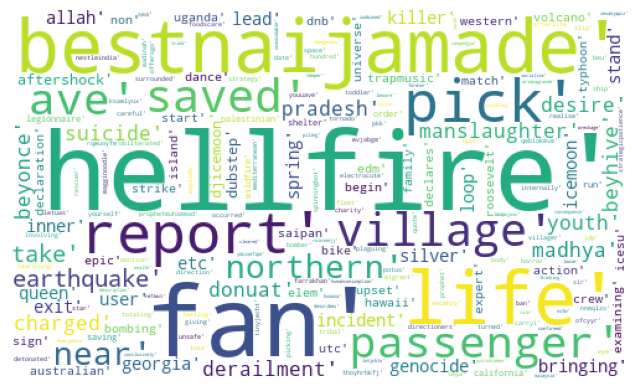

In [64]:
count = Counter(list(data['lemmas']))
top_words = {}
make_dict(count.most_common(100), top_words)
df = pd.DataFrame.from_dict(top_words, orient = 'index').reset_index()
df.columns=['word', 'count']
text = df['word'].values
wordcloud_keywords = WordCloud(background_color = 'white', width = 500, height = 300, collocations = True).generate(str(text))
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud_keywords)
plt.axis('off')
plt.savefig('figures/ppt_wordcloud.png', bbox_inches = 'tight')
plt.show()

In [65]:
import scipy
from imageio import imread



In [66]:
twitter_mask = imread('twitter_mask.png')

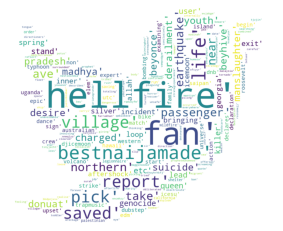

In [67]:
wordcloud = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('figures/ppt_wordcloud.png', dpi=300)
plt.show()

In [68]:
data = pd.read_csv(r'C:\Users\ibane\OneDrive\Python\Springboard\Springboard\Capstone 3\datasets\train.csv')
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [74]:
keywords = data.drop(['location', 'text', 'id'], axis = 1)
keywords.shape
keywords = keywords.dropna()
#lets clean the keywords so it omits %20, any accents and punctuation
def clean_keywords(keyword):
    cleaned = re.sub(r'%20', ' ', keyword)
    return cleaned
def remove_accents(keyword):
    cleaned = unidecode.unidecode(keyword)
    return cleaned
def remove_punctuation(keyword):
    cleaned = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",keyword)
    return cleaned
keywords['keyword'] = keywords['keyword'].apply(lambda x: clean_keywords(x))
keywords['keyword'] = keywords['keyword'].apply(lambda x: remove_accents(x))
keywords['keyword'] = keywords['keyword'].apply(lambda x: remove_punctuation(x))

In [75]:
stemmer = PorterStemmer()
keywords['stems'] = keywords['keyword'].apply(lambda x: stemmer.stem(x))

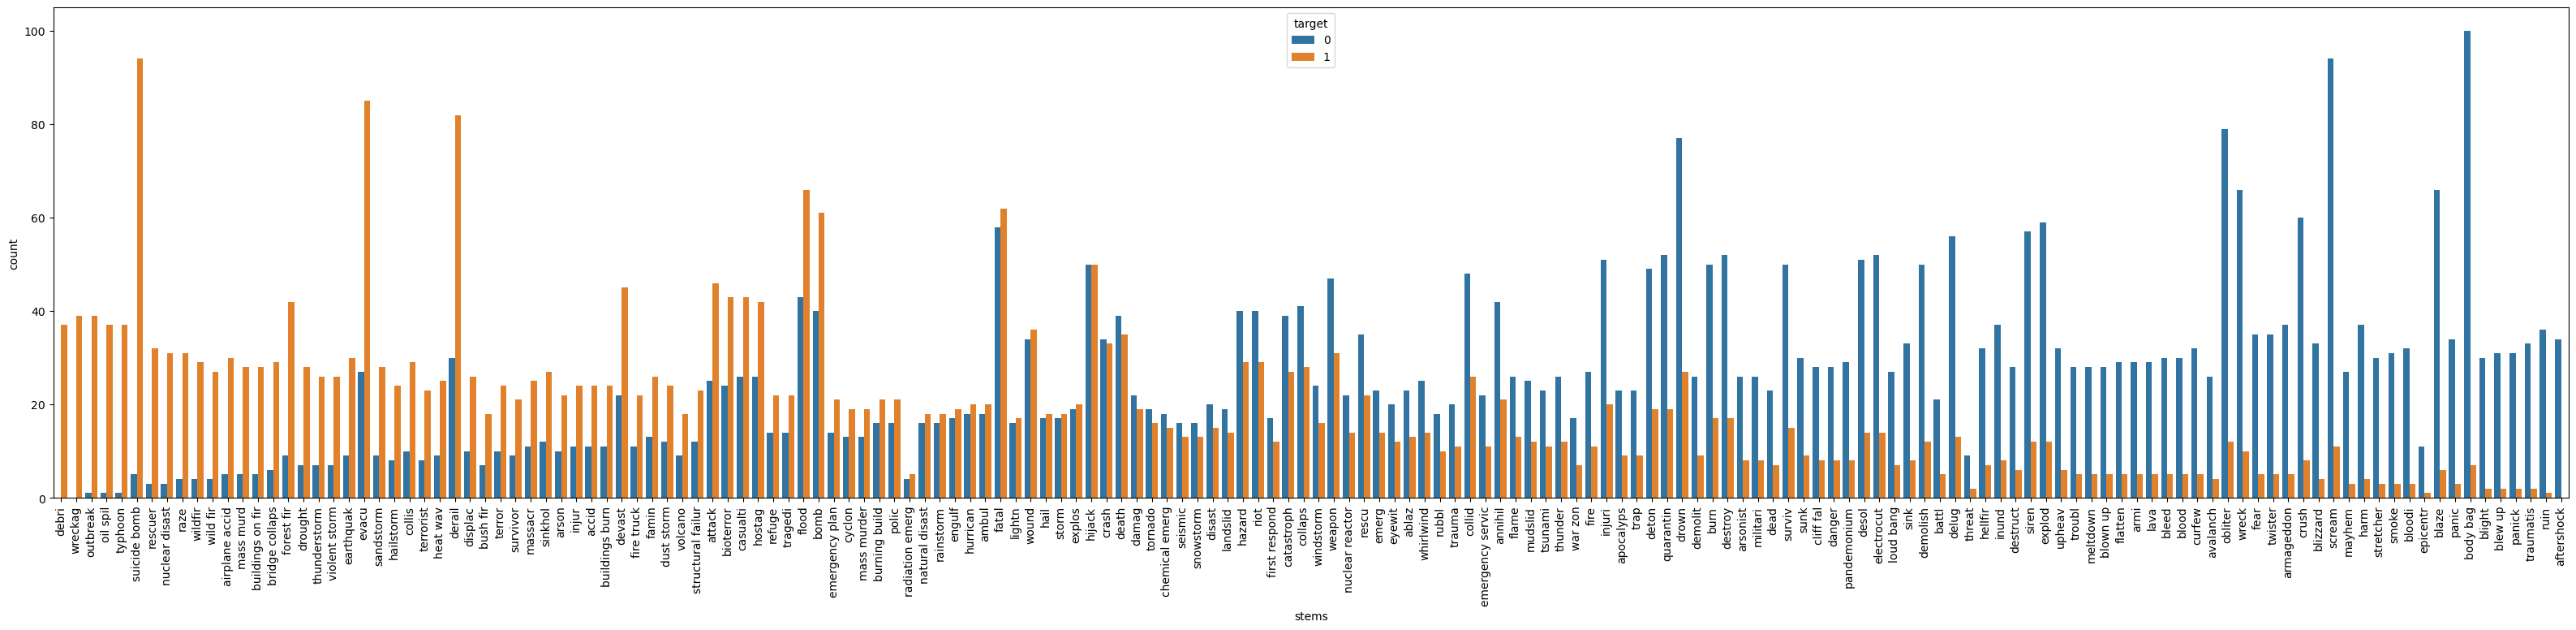

In [79]:
keywords['target_mean_stem'] = keywords.groupby('stems')['target'].transform('mean')
fig = plt.figure(figsize=(40, 8), dpi=100)
sns.countplot(x=keywords.sort_values(by='target_mean_stem', ascending = False)['stems'], 
              hue = keywords.sort_values(by='target_mean_stem', ascending =False)['target'])
plt.xticks(rotation = 90)
plt.savefig('figures/keywords_distributions_ppt.png', bbox_inches = 'tight')
plt.show()
